In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\paran\OneDrive\Desktop\project\Bank Customer Churn Prediction.csv")
data.head(3)
data.tail(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


churn 1 if the client has left the bank during some period or 0 if he/she has not

Every bank wants to hold there customers for sustaining their business,
this dataset is the customer data of account holders in a Bank and the aim of the data will be predicting the Customer Churn.

In [3]:
data.shape

(10000, 12)

# Data Cleaning

# 1. Missing value Treatment

In [4]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

This data doesnt have any missing values 

for example if there is any missing values, first check the missing value column in numerical or categorical
1) If the column is numerical impute the missing value with mean or median, if you use mean it has highly affected in outliers so
impute with median always better.
2) if the missing value column is categorical impute the missing data with the least count(category) in the same column.

# 2. Dropping the Unique Id column

In [5]:
C_ID = data["customer_id"]
data = data.drop(["customer_id"],axis = 1)

In [6]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

# 3. Dtype Conversion

Datatype conversion done by the label Encoder 

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data.country.value_counts()
data.country = le.fit_transform(data.country)

In [9]:
data.gender.value_counts()
data.gender = le.fit_transform(data.gender)

In [10]:
data.dtypes

credit_score          int64
country               int32
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

# checking the value count of target variable

In [11]:
data.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

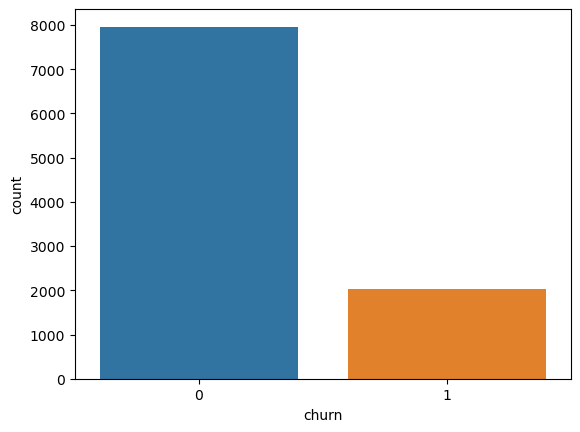

In [12]:
sns.countplot("churn",data=data)
plt.show()

# Base model

# Splitting data

In [13]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr_p=lr.predict(xtest)
lr_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr_cf=confusion_matrix(lr_p,ytest)
lr_ac=lr_cf.diagonal().sum()/lr_cf.sum()*100
lr_cf,lr_ac

(array([[1556,  388],
        [  32,   24]], dtype=int64),
 79.0)

In [17]:
print(classification_report(lr_p,ytest))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1944
           1       0.06      0.43      0.10        56

    accuracy                           0.79      2000
   macro avg       0.52      0.61      0.49      2000
weighted avg       0.95      0.79      0.86      2000



In [18]:
lg_pre_score= precision_score(ytest,lr_p)
lg_re_score= recall_score(ytest,lr_p)
lg_f1_score= f1_score(ytest,lr_p)
lg_pre_score,lg_re_score,lg_f1_score

(0.42857142857142855, 0.05825242718446602, 0.10256410256410256)

# 2. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt_p=dt.predict(xtest)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
dt_cf=confusion_matrix(dt_p,ytest)
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_cf,dt_ac

(array([[1358,  224],
        [ 230,  188]], dtype=int64),
 77.3)

In [21]:
print(classification_report(dt_p,ytest))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1582
           1       0.46      0.45      0.45       418

    accuracy                           0.77      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.77      0.77      0.77      2000



In [22]:
dt_pre_score= precision_score(ytest,lr_p)
dt_re_score= recall_score(ytest,lr_p)
dt_f1_score= f1_score(ytest,lr_p)
dt_pre_score,dt_re_score,dt_f1_score

(0.42857142857142855, 0.05825242718446602, 0.10256410256410256)

# 3.RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_p=rf.predict(xtest)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
rf_cf=confusion_matrix(rf_p,ytest)
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_cf,rf_ac

(array([[1535,  238],
        [  53,  174]], dtype=int64),
 85.45)

In [25]:
print(classification_report(rf_p,ytest))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1773
           1       0.42      0.77      0.54       227

    accuracy                           0.85      2000
   macro avg       0.69      0.82      0.73      2000
weighted avg       0.90      0.85      0.87      2000



In [26]:
rf_pre_score= precision_score(ytest,rf_p)
rf_re_score= recall_score(ytest,rf_p)
rf_f1_score= f1_score(ytest,rf_p)
rf_pre_score,rf_re_score,rf_f1_score

(0.7665198237885462, 0.4223300970873786, 0.5446009389671361)

# 4.KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn_p=knn.predict(xtest)
knn_p

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
knn_cf=confusion_matrix(knn_p,ytest)
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_cf,knn_ac


(array([[1470,  376],
        [ 118,   36]], dtype=int64),
 75.3)

In [29]:
print(classification_report(knn_p,ytest))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1846
           1       0.09      0.23      0.13       154

    accuracy                           0.75      2000
   macro avg       0.51      0.52      0.49      2000
weighted avg       0.86      0.75      0.80      2000



In [30]:
knn_pre_score= precision_score(ytest,knn_p)
knn_re_score= recall_score(ytest,knn_p)
knn_f1_score= f1_score(ytest,knn_p)
knn_pre_score,knn_re_score,knn_f1_score

(0.23376623376623376, 0.08737864077669903, 0.12720848056537104)

# 5.SVM

In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
svc_p=svc.predict(xtest)
svc_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
svc_cf=confusion_matrix(svc_p,ytest)
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_cf,svc_ac

(array([[1588,  412],
        [   0,    0]], dtype=int64),
 79.4)

In [33]:
print(classification_report(svc_p,ytest))

              precision    recall  f1-score   support

           0       1.00      0.79      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.79      0.89      2000



In [34]:
svm_pre_score= precision_score(ytest,svc_p)
svm_re_score= recall_score(ytest,svc_p)
svm_f1_score= f1_score(ytest,svc_p)
svm_pre_score,svm_re_score,svm_f1_score

(0.0, 0.0, 0.0)

# 6.Naive bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
nb_p=nb.predict(xtest)
nb_p

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
nb_cf=confusion_matrix(nb_p,ytest)
nb_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_cf,nb_acc

(array([[895, 177],
        [693, 235]], dtype=int64),
 56.49999999999999)

In [37]:
print(classification_report(nb_p,ytest))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1072
           1       0.57      0.25      0.35       928

    accuracy                           0.56      2000
   macro avg       0.57      0.54      0.51      2000
weighted avg       0.57      0.56      0.52      2000



In [38]:
nb_pre_score= precision_score(ytest,nb_p)
nb_re_score= recall_score(ytest,nb_p)
nb_f1_score= f1_score(ytest,nb_p)
nb_pre_score,nb_re_score,nb_f1_score

(0.25323275862068967, 0.5703883495145631, 0.35074626865671643)

# XG Boost

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
xgb_p=xgb.predict(xtest)
xgb_p

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
xgb_cf=confusion_matrix(xgb_p,ytest)
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_cf,xgb_ac

(array([[1511,  222],
        [  77,  190]], dtype=int64),
 85.05)

In [41]:
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1733
           1       0.46      0.71      0.56       267

    accuracy                           0.85      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.89      0.85      0.86      2000



In [42]:
xgb_pre_score= precision_score(ytest,xgb_p)
xgb_re_score= recall_score(ytest,xgb_p)
xgb_f1_score= f1_score(ytest,xgb_p)
xgb_pre_score,xgb_re_score,xgb_f1_score

(0.7116104868913857, 0.46116504854368934, 0.5596465390279823)

In [43]:
list1=["Logistic Regression","Decision Tree","Random Forest","KNearest Neighbor","Support Vector Machine","Naive Bayes","XG_Boost"]
list2=[lr_ac,dt_ac,rf_ac,knn_ac,svc_ac,nb_acc,xgb_ac]
list3=[lg_pre_score,dt_pre_score,rf_pre_score,knn_pre_score,svm_pre_score,nb_pre_score,xgb_pre_score]
list4=[lg_re_score,dt_re_score,rf_re_score,knn_re_score,svm_re_score,nb_re_score,xgb_re_score]
list5=[lg_f1_score,dt_f1_score,rf_f1_score,knn_f1_score,svm_f1_score,nb_f1_score,xgb_f1_score]

In [44]:
Basemodel_df= pd.DataFrame({"basemodel name":list1,"accuracy":list2,"precision":list3,"recall":list4,"f1score":list5})
Basemodel_df

,basemodel name,accuracy,precision,recall,f1score
0,Logistic Regression,79.00,0.428571,0.058252,0.102564
1,Decision Tree,77.30,0.428571,0.058252,0.102564
2,Random Forest,85.45,0.766520,0.422330,0.544601
3,KNearest Neighbor,75.30,0.233766,0.087379,0.127208
4,Support Vector Machine,79.40,0.000000,0.000000,0.000000
5,Naive Bayes,56.50,0.253233,0.570388,0.350746
6,XG_Boost,85.05,0.711610,0.461165,0.559647


# BASEMODEL CONCLUSION:

Out of these models, Except NaiveBayes all models gives better though accuracy when it comes to precision recall and f1score are very low, This is due to the Class Imbalance problem in this Dataset

# Class imbalance

In [45]:
c_0,c_1 = data["churn"].value_counts()
c_0,c_1

(7963, 2037)

In [46]:
train_0 = data[data["churn"]==0]
train_1 = data[data["churn"]==1]

In [47]:
train_0.shape,train_1.shape

((7963, 11), (2037, 11))

# Random Over sampling

In [48]:
data1=train_1.sample(c_0,replace=True)
data1.shape

(7963, 11)

In [49]:
class1_0=pd.concat([train_0,data1],axis=0)
class1_0.shape

(15926, 11)

# Outlier treatment

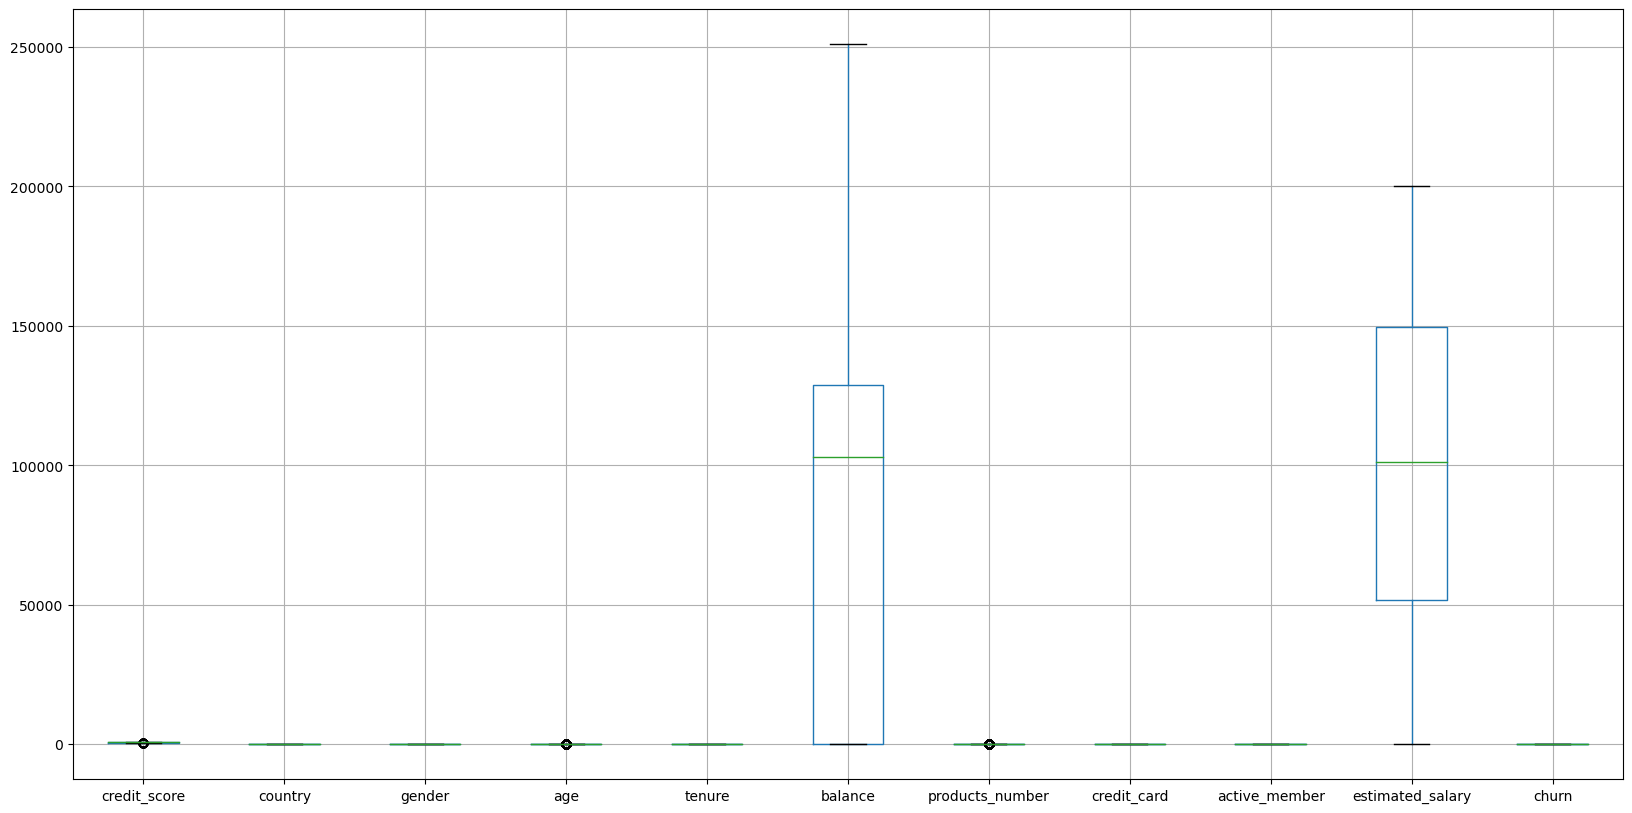

In [50]:
class1_0.boxplot(figsize=(20,10))
plt.show()

In [51]:
class1_0.credit_score.value_counts()

850    353
651    114
678    110
705     93
710     91
      ... 
412      1
441      1
442      1
440      1
383      1
Name: credit_score, Length: 459, dtype: int64

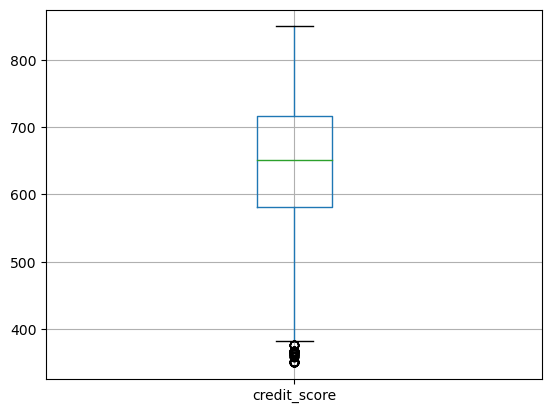

In [52]:
class1_0.boxplot(column="credit_score")
plt.show()

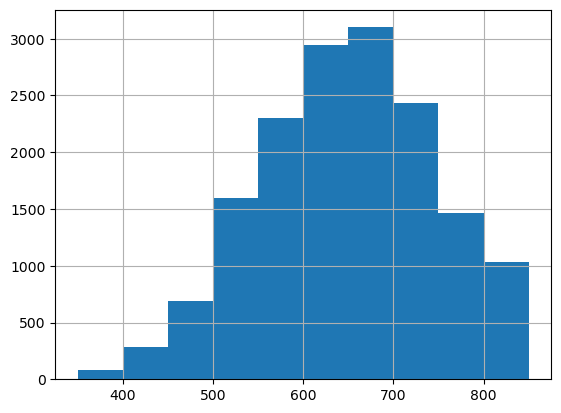

In [53]:
class1_0.credit_score.hist()
plt.show()

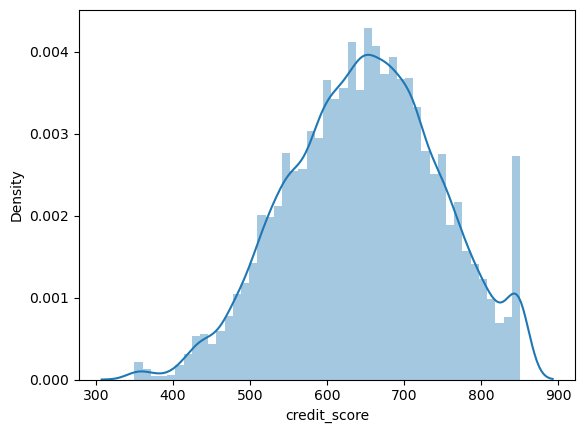

In [54]:
sns.distplot(class1_0.credit_score)
plt.show()

In [55]:
l_b=class1_0["credit_score"].mean()-3*class1_0["credit_score"].std()
l_b

354.68177624771215

In [56]:
class1_0.loc[class1_0["credit_score"]<355,"credit_score"]=355

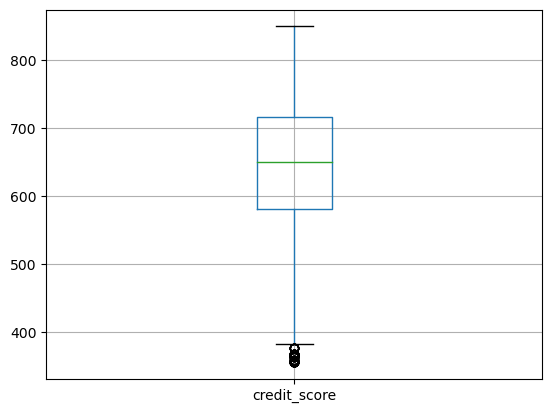

In [57]:
class1_0.boxplot(column="credit_score")
plt.show()

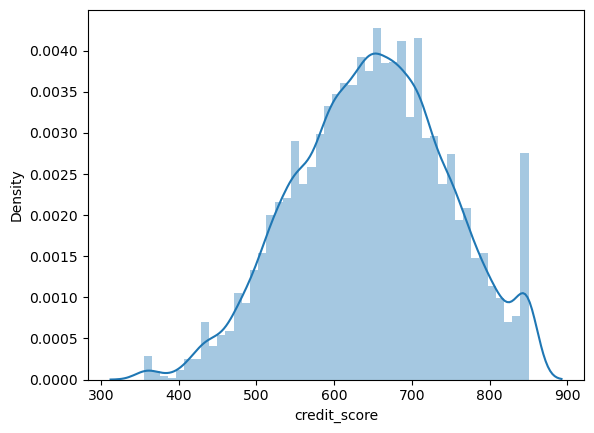

In [58]:
sns.distplot(class1_0.credit_score)
plt.show()

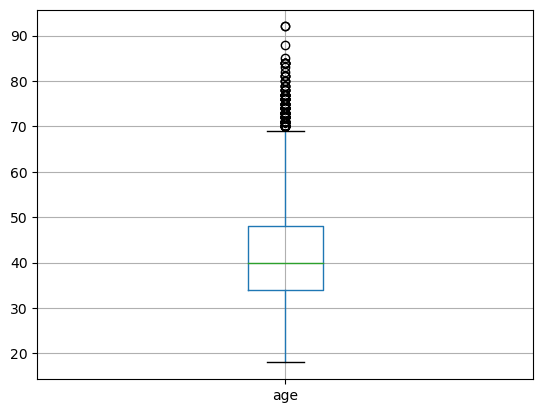

In [59]:
class1_0.boxplot(column="age")
plt.show()

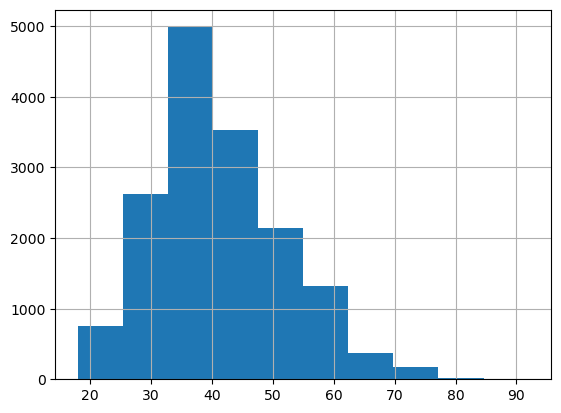

In [60]:
class1_0.age.hist()
plt.show()

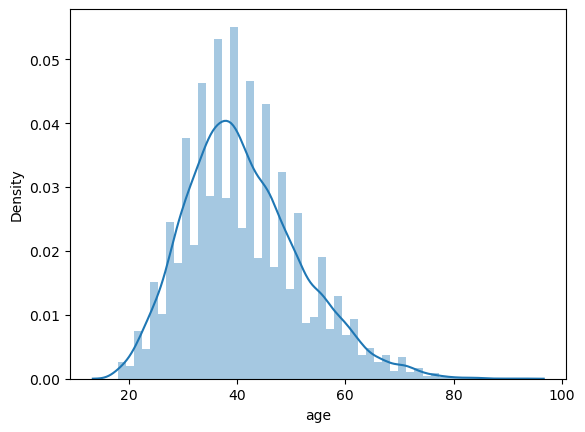

In [61]:
sns.distplot(class1_0.age)
plt.show()

In [62]:
u_b=class1_0["age"].mean()+3*class1_0["age"].std()
u_b

73.1552438092562

In [63]:
class1_0.loc[class1_0["age"]>72,"age"]=72

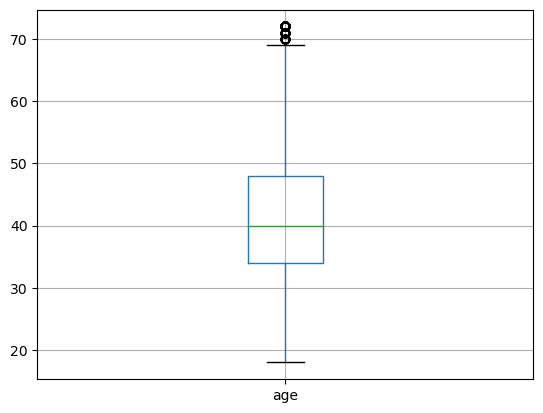

In [64]:
class1_0.boxplot(column="age")
plt.show()

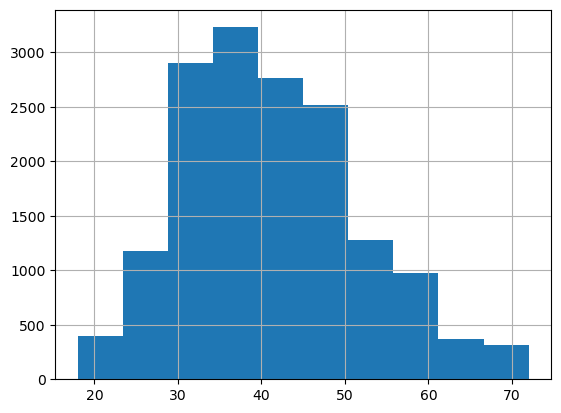

In [65]:
class1_0.age.hist()
plt.show()

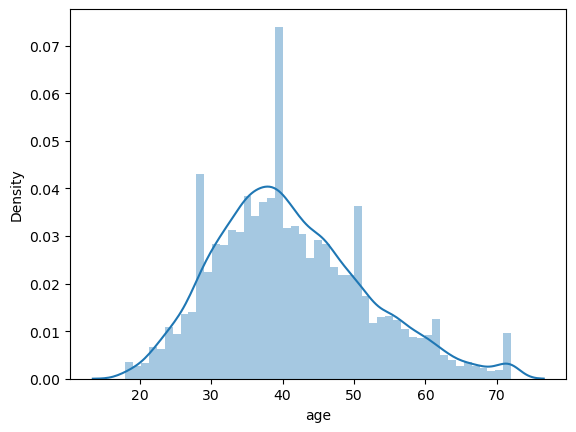

In [66]:
sns.distplot(class1_0.age)
plt.show()

In [67]:
class1_0.skew()

credit_score       -0.110683
country             0.444115
gender             -0.029392
age                 0.521017
tenure              0.040029
balance            -0.264748
products_number     1.275079
credit_card        -0.894221
active_member       0.162295
estimated_salary   -0.011234
churn               0.000000
dtype: float64

from this above skewness, products_number is a categorical column so we cant treat skewness and outlier for that column.

# VISUALIZATION

In [68]:
data_cor = class1_0.corr()
data_cor

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.017446,0.007330,-0.008650,0.016409,0.004776,0.018454,0.001076,0.019841,-0.029078,-0.036312
country,0.017446,1.000000,-0.002001,0.014646,-0.012016,0.087785,0.019287,-0.014470,-0.007321,0.004083,0.045161
gender,0.007330,-0.002001,1.000000,-0.047974,0.016759,0.012759,-0.030011,0.013241,0.026898,-0.007804,-0.130367
age,-0.008650,0.014646,-0.047974,1.000000,-0.024502,0.035938,-0.032482,-0.023183,0.006848,-0.005444,0.360089
tenure,0.016409,-0.012016,0.016759,-0.024502,1.000000,0.002534,0.013330,0.018166,-0.029856,0.014892,-0.029865
balance,0.004776,0.087785,0.012759,0.035938,0.002534,1.000000,-0.188544,-0.011187,-0.024326,-0.001786,0.141620
products_number,0.018454,0.019287,-0.030011,-0.032482,0.013330,-0.188544,1.000000,-0.010689,0.035531,0.010121,-0.062537
credit_card,0.001076,-0.014470,0.013241,-0.023183,0.018166,-0.011187,-0.010689,1.000000,-0.035905,-0.010744,-0.006740
active_member,0.019841,-0.007321,0.026898,0.006848,-0.029856,-0.024326,0.035531,-0.035905,1.000000,-0.007607,-0.190628
estimated_salary,-0.029078,0.004083,-0.007804,-0.005444,0.014892,-0.001786,0.010121,-0.010744,-0.007607,1.000000,0.014005


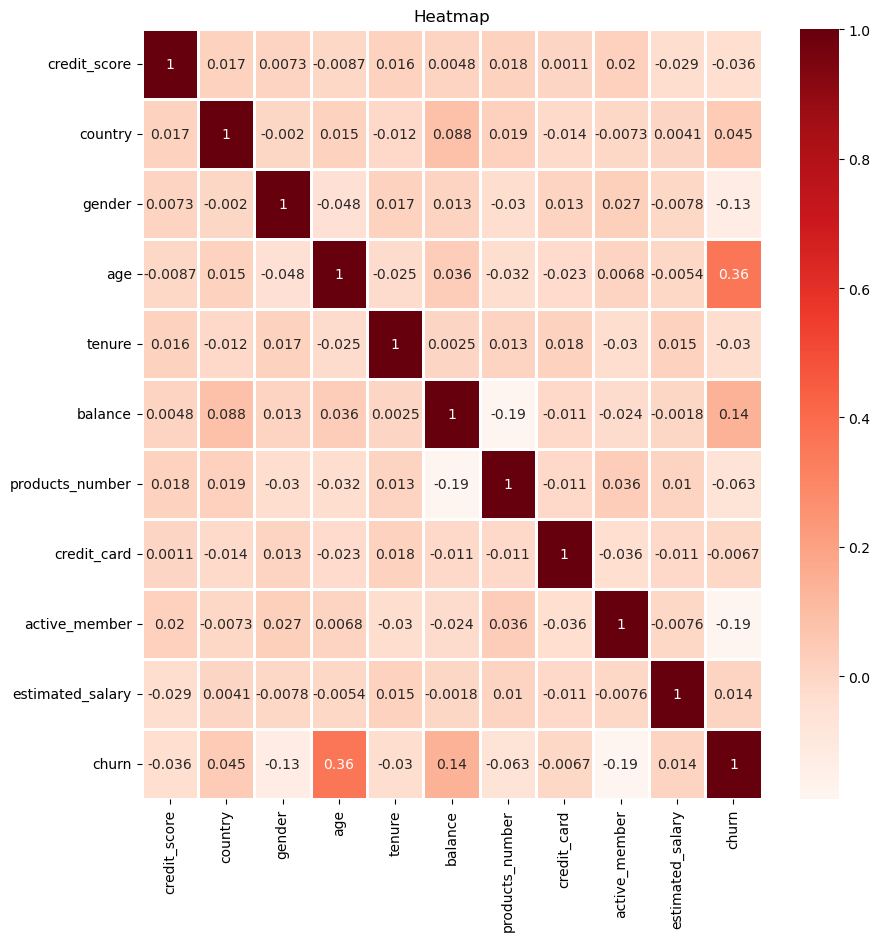

In [69]:
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(data_cor,linewidth = 1,annot = True,cmap = plt.cm.Reds)
plt.title("Heatmap")
plt.show()

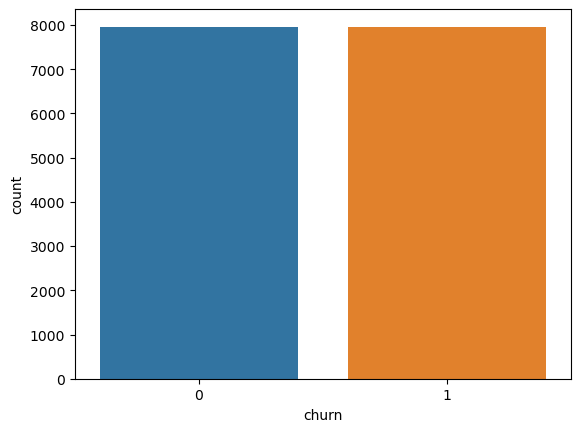

In [70]:
sns.countplot("churn",data=class1_0)
plt.show()

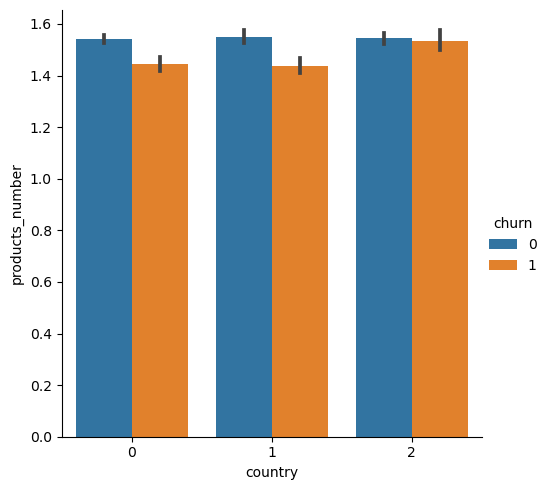

In [71]:
sns.catplot(x="country",y="products_number",hue="churn",kind="bar",data=class1_0)
plt.show()

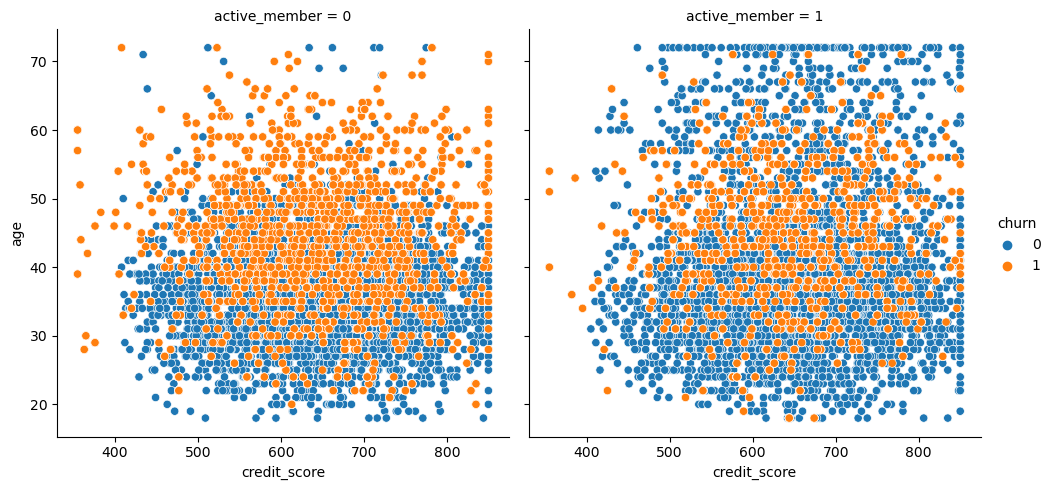

In [72]:
sns.relplot(data=class1_0,x="credit_score",y="age",col="active_member",hue="churn")
plt.show()

# Splitting classimbalance treated data 

In [73]:
o_x=class1_0.iloc[:,0:-1]
o_y=class1_0.iloc[:,-1]
oxtr,oxte,oytr,oyte=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
oxtr.shape,oxte.shape,oytr.shape,oyte.shape

((12740, 10), (3186, 10), (12740,), (3186,))

# 1.Logistic Regression

In [74]:
lr.fit(oxtr,oytr)
olr_p=lr.predict(oxte)
olr_p

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [75]:
olr_cf=confusion_matrix(olr_p,oyte)
olr_ac=olr_cf.diagonal().sum()/olr_cf.sum()*100
olr_cf,olr_ac

(array([[ 994,  494],
        [ 593, 1105]], dtype=int64),
 65.88198367859384)

In [76]:
print(classification_report(olr_p,oyte))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1488
           1       0.69      0.65      0.67      1698

    accuracy                           0.66      3186
   macro avg       0.66      0.66      0.66      3186
weighted avg       0.66      0.66      0.66      3186



In [77]:
o_lg_pre_score= precision_score(oyte,olr_p)
o_lg_re_score= recall_score(oyte,olr_p)
o_lg_f1_score= f1_score(oyte,olr_p)
o_lg_pre_score,o_lg_re_score,o_lg_f1_score

(0.6507656065959952, 0.6910569105691057, 0.670306339096148)

# 2. DT

In [78]:
dt.fit(oxtr,oytr)
odt_p=dt.predict(oxte)
odt_p

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [79]:
odt_cf=confusion_matrix(odt_p,oyte)
odt_ac=odt_cf.diagonal().sum()/odt_cf.sum()*100
odt_cf,odt_ac

(array([[1317,   40],
        [ 270, 1559]], dtype=int64),
 90.26993094789705)

In [80]:
print(classification_report(odt_p,oyte))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1357
           1       0.97      0.85      0.91      1829

    accuracy                           0.90      3186
   macro avg       0.90      0.91      0.90      3186
weighted avg       0.91      0.90      0.90      3186



In [81]:
o_dt_pre_score= precision_score(oyte,odt_p)
o_dt_re_score= recall_score(oyte,odt_p)
o_dt_f1_score= f1_score(oyte,odt_p)
o_dt_pre_score,o_dt_re_score,o_dt_f1_score

(0.8523783488244943, 0.9749843652282677, 0.9095682613768962)

# 3. Random Forest

In [82]:
rf.fit(oxtr,oytr)
orf_p=rf.predict(oxte)
orf_p

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
orf_cf=confusion_matrix(orf_p,oyte)
orf_ac=orf_cf.diagonal().sum()/orf_cf.sum()*100
orf_cf,orf_ac

(array([[1447,   41],
        [ 140, 1558]], dtype=int64),
 94.31889516635279)

In [84]:
print(classification_report(orf_p,oyte))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1488
           1       0.97      0.92      0.95      1698

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.95      0.94      0.94      3186



In [85]:
o_rf_pre_score= precision_score(oyte,orf_p)
o_rf_re_score= recall_score(oyte,orf_p)
o_rf_f1_score= f1_score(oyte,orf_p)
o_rf_pre_score,o_rf_re_score,o_rf_f1_score

(0.917550058892815, 0.9743589743589743, 0.9451016075219897)

# 4.KNN

In [86]:
knn.fit(oxtr,oytr)
ok_p=knn.predict(oxte)
ok_p

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [87]:
ok_cf=confusion_matrix(ok_p,oyte)
ok_ac=ok_cf.diagonal().sum()/ok_cf.sum()*100
ok_ac,ok_cf

(70.30759573132454,
 array([[ 936,  295],
        [ 651, 1304]], dtype=int64))

In [88]:
print(classification_report(ok_p,oyte))

              precision    recall  f1-score   support

           0       0.59      0.76      0.66      1231
           1       0.82      0.67      0.73      1955

    accuracy                           0.70      3186
   macro avg       0.70      0.71      0.70      3186
weighted avg       0.73      0.70      0.71      3186



In [89]:
o_k_pre_score= precision_score(oyte,ok_p)
o_k_re_score= recall_score(oyte,ok_p)
o_k_f1_score= f1_score(oyte,ok_p)
o_k_pre_score,o_k_re_score,o_k_f1_score

(0.6670076726342711, 0.815509693558474, 0.7338210467079347)

# 5.SVM

In [90]:
svc.fit(oxtr,oytr)
os_p=svc.predict(oxte)
os_p

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [91]:
os_cf=confusion_matrix(os_p,oyte)
os_ac=os_cf.diagonal().sum()/os_cf.sum()*100
os_cf,os_ac

(array([[ 611,  412],
        [ 976, 1187]], dtype=int64),
 56.434400502197114)

In [92]:
print(classification_report(os_p,oyte))

              precision    recall  f1-score   support

           0       0.39      0.60      0.47      1023
           1       0.74      0.55      0.63      2163

    accuracy                           0.56      3186
   macro avg       0.56      0.57      0.55      3186
weighted avg       0.63      0.56      0.58      3186



In [93]:
o_s_pre_score= precision_score(oyte,os_p)
o_s_re_score= recall_score(oyte,os_p)
o_s_f1_score= f1_score(oyte,os_p)
o_s_pre_score,o_s_re_score,o_s_f1_score

(0.5487748497457235, 0.742338961851157, 0.6310473152578416)

# 6. Naive Bayes

In [94]:
nb.fit(oxtr,oytr)
on_p=nb.predict(oxte)
on_p

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [95]:
on_cf=confusion_matrix(on_p,oyte)
on_ac=on_cf.diagonal().sum()/on_cf.sum()*100
on_cf,on_ac

(array([[851, 736],
        [736, 863]], dtype=int64),
 53.797865662272436)

In [96]:
print(classification_report(on_p,oyte))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1587
           1       0.54      0.54      0.54      1599

    accuracy                           0.54      3186
   macro avg       0.54      0.54      0.54      3186
weighted avg       0.54      0.54      0.54      3186



In [97]:
o_n_pre_score= precision_score(oyte,on_p)
o_n_re_score= recall_score(oyte,on_p)
o_n_f1_score= f1_score(oyte,on_p)
o_n_pre_score,o_n_re_score,o_n_f1_score

(0.539712320200125, 0.539712320200125, 0.539712320200125)

# 7. XG Boost

In [98]:
xgb.fit(oxtr,oytr)
oxg_p=xgb.predict(oxte)
oxg_p

array([0, 0, 1, ..., 1, 0, 0])

In [99]:
oxg_cf=confusion_matrix(oxg_p,oyte)
oxg_ac=oxg_cf.diagonal().sum()/oxg_cf.sum()*100
oxg_cf,oxg_ac

(array([[1366,  108],
        [ 221, 1491]], dtype=int64),
 89.67357187696172)

In [100]:
print(classification_report(oxg_p,oyte))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1474
           1       0.93      0.87      0.90      1712

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [101]:
o_xg_pre_score= precision_score(oyte,oxg_p)
o_xg_re_score= recall_score(oyte,oxg_p)
o_xg_f1_score= f1_score(oyte,oxg_p)
o_xg_pre_score,o_xg_re_score,o_xg_f1_score

(0.8709112149532711, 0.9324577861163227, 0.9006342494714588)

# Over sampling DataFrame

In [102]:
ls_over1=["Logistic Regression","Decision Tree","Random Forest","KNearest Neighbor","Support Vector Machine","Naive Bayes","XG_Boost"]
ls_over2=[olr_ac,odt_ac,orf_ac,ok_ac,os_ac,on_ac,oxg_ac]
ls_over3=[o_lg_pre_score,o_dt_pre_score,o_rf_pre_score,o_s_pre_score,o_k_pre_score,o_n_pre_score,o_xg_pre_score]
ls_over4=[o_lg_re_score,o_dt_re_score,o_rf_re_score,o_s_re_score,o_k_re_score,o_n_re_score,o_xg_re_score]
ls_over5=[o_lg_f1_score,o_dt_f1_score,o_rf_f1_score,o_s_f1_score,o_k_f1_score,o_n_f1_score,o_xg_f1_score]

In [103]:
overs_df = pd.DataFrame({"Random Oversampling":ls_over1,"Accuracy":ls_over2,"Precision":ls_over3,"Recall":ls_over4,"F1_Score":ls_over5})
overs_df

,Random Oversampling,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,65.881984,0.650766,0.691057,0.670306
1,Decision Tree,90.269931,0.852378,0.974984,0.909568
2,Random Forest,94.318895,0.917550,0.974359,0.945102
3,KNearest Neighbor,70.307596,0.548775,0.742339,0.631047
4,Support Vector Machine,56.434401,0.667008,0.815510,0.733821
5,Naive Bayes,53.797866,0.539712,0.539712,0.539712
6,XG_Boost,89.673572,0.870911,0.932458,0.900634


# Conclusion:
Out of these models,after treating class imbalance with Random oversampling Decision Tree, Random Forest, XGBoost is better with good accuracy,precision,recall and f1 score compared to others. so Perform Feature Selection in these Three models.

# Feature selection

# RFE- Recursive Feature Elimination (RFE)

In [104]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
rfe=RFE(dtree)
rfe.fit(o_x,o_y)
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True])

In [105]:
rfe_df =pd.DataFrame({"features":list(rfe.support_),"columns":list(o_x)})
rfe_df

,features,columns
0,True,credit_score
1,False,country
2,False,gender
3,True,age
4,False,tenure
5,True,balance
6,True,products_number
7,False,credit_card
8,False,active_member
9,True,estimated_salary


In [106]:
new_x1= o_x.drop(["country","gender","tenure","credit_card","active_member"],axis=1)
x_tr1,x_te1,y_tr1,y_te1=train_test_split(new_x1,o_y,test_size=0.2,random_state=100)
x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

((12740, 5), (3186, 5), (12740,), (3186,))

# Decision tree (RFE)

In [107]:
dt.fit(x_tr1,y_tr1)
rdt_p=dt.predict(x_te1)
rdt_p

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
rdt_cf=confusion_matrix(rdt_p,y_te1)
rdt_ac=rdt_cf.diagonal().sum()/rdt_cf.sum()*100
rdt_ac,rdt_cf

(90.89767733835531,
 array([[1333,   36],
        [ 254, 1563]], dtype=int64))

In [109]:
print(classification_report(rdt_p,y_te1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1369
           1       0.98      0.86      0.92      1817

    accuracy                           0.91      3186
   macro avg       0.91      0.92      0.91      3186
weighted avg       0.92      0.91      0.91      3186



In [110]:
fs1_dt_pre_score= precision_score(y_te1,rdt_p)
fs1_dt_re_score= recall_score(y_te1,rdt_p)
fs1_dt_f1_score= f1_score(y_te1,rdt_p)
fs1_dt_pre_score,fs1_dt_re_score,fs1_dt_f1_score

(0.8602091359383599, 0.9774859287054409, 0.9151053864168619)

# Random Forest   (RFE)

In [111]:
rf.fit(x_tr1,y_tr1)
rrf_p=rf.predict(x_te1)
rrf_p

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [112]:
rrf_cf=confusion_matrix(rrf_p,y_te1)
rrf_ac=rrf_cf.diagonal().sum()/rrf_cf.sum()*100
rrf_cf,rrf_ac

(array([[1393,   35],
        [ 194, 1564]], dtype=int64),
 92.81230382925298)

In [113]:
print(classification_report(rrf_p,y_te1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1428
           1       0.98      0.89      0.93      1758

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93      0.93      0.93      3186



In [114]:
fs1_rf_pre_score= precision_score(y_te1,rrf_p)
fs1_rf_re_score= recall_score(y_te1,rrf_p)
fs1_rf_f1_score= f1_score(y_te1,rrf_p)
fs1_rf_pre_score,fs1_rf_re_score,fs1_rf_f1_score

(0.8896473265073948, 0.9781113195747342, 0.9317843312481382)

# XG Boost (RFE)

In [115]:
xgb.fit(x_tr1,y_tr1)
rxg_p=xgb.predict(x_te1)
rxg_p

array([0, 1, 1, ..., 1, 0, 0])

In [116]:
rxg_cf=confusion_matrix(rxg_p,y_te1)
rxg_ac=rxg_cf.diagonal().sum()/rxg_cf.sum()*100
rxg_cf,rxg_ac

(array([[1310,  139],
        [ 277, 1460]], dtype=int64),
 86.94287507846829)

In [117]:
print(classification_report(rxg_p,y_te1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1449
           1       0.91      0.84      0.88      1737

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [118]:
fs1_xg_pre_score= precision_score(y_te1,rxg_p)
fs1_xg_re_score= recall_score(y_te1,rxg_p)
fs1_xg_f1_score= f1_score(y_te1,rxg_p)
fs1_xg_pre_score,fs1_xg_re_score,fs1_xg_f1_score

(0.8405296488198043, 0.9130706691682301, 0.8752997601918465)

# DataFrame For all Model

In [119]:
ls_f_rfe1=["Decision Tree","Random Forest","XG_Boost"]
ls_f_rfe2=[rdt_ac,rrf_ac,rxg_ac]
ls_f_rfe3=[fs1_dt_pre_score,fs1_rf_pre_score,fs1_xg_pre_score]
ls_f_rfe4=[fs1_dt_re_score,fs1_rf_re_score,fs1_xg_re_score]
ls_f_rfe5=[fs1_dt_f1_score,fs1_rf_f1_score,fs1_xg_f1_score]

In [120]:
final_rfe = pd.DataFrame({"Feature_RFE":ls_f_rfe1,"Accuracy":ls_f_rfe2,"Precision":ls_f_rfe3,"Recall":ls_f_rfe4,"F1_Score":ls_f_rfe5})
final_rfe

,Feature_RFE,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,90.897677,0.860209,0.977486,0.915105
1,Random Forest,92.812304,0.889647,0.978111,0.931784
2,XG_Boost,86.942875,0.840530,0.913071,0.875300


# Final Model Conclusion

Out of these models, after feature selection Random Forest is good model and True negative value is high in the confusion matrix so put PRC Curve.

# PRC CURVE

In [121]:
rrf_prob=rf.predict_proba(x_te1)
rrf_df=pd.DataFrame(rrf_prob)
#rrf_prob
rrf_df

,0,1
0,0.99,0.01
1,0.39,0.61
2,0.62,0.38
3,0.00,1.00
4,0.42,0.58
...,...,...
3181,0.00,1.00
3182,0.94,0.06
3183,0.43,0.57
3184,0.96,0.04


In [122]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [123]:
rrf_precision,rrf_recall,rrf_threshold=precision_recall_curve(y_te1,rrf_df.iloc[:,1])

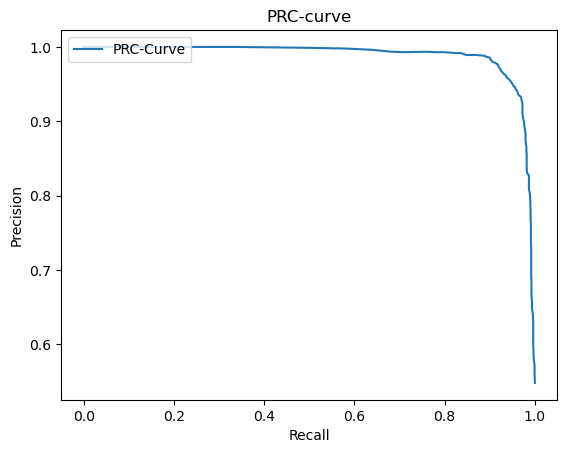

In [124]:
plt.plot(rrf_recall,rrf_precision,label="PRC-Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-curve")
plt.show()

# PRC Curve Conclusion

A PRC curve indicated that the binary classification model have better performance in this classimbalance data.

# Comparison of All model in DataFrame

In [125]:
display(Basemodel_df,overs_df,final_rfe)

,basemodel name,accuracy,precision,recall,f1score
0,Logistic Regression,79.00,0.428571,0.058252,0.102564
1,Decision Tree,77.30,0.428571,0.058252,0.102564
2,Random Forest,85.45,0.766520,0.422330,0.544601
3,KNearest Neighbor,75.30,0.233766,0.087379,0.127208
4,Support Vector Machine,79.40,0.000000,0.000000,0.000000
5,Naive Bayes,56.50,0.253233,0.570388,0.350746
6,XG_Boost,85.05,0.711610,0.461165,0.559647


,Random Oversampling,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,65.881984,0.650766,0.691057,0.670306
1,Decision Tree,90.269931,0.852378,0.974984,0.909568
2,Random Forest,94.318895,0.917550,0.974359,0.945102
3,KNearest Neighbor,70.307596,0.548775,0.742339,0.631047
4,Support Vector Machine,56.434401,0.667008,0.815510,0.733821
5,Naive Bayes,53.797866,0.539712,0.539712,0.539712
6,XG_Boost,89.673572,0.870911,0.932458,0.900634


,Feature_RFE,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,90.897677,0.860209,0.977486,0.915105
1,Random Forest,92.812304,0.889647,0.978111,0.931784
2,XG_Boost,86.942875,0.840530,0.913071,0.875300


#    CROSS VALIDATION

In [126]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
num_folds=5
kf=KFold(n_splits=num_folds)
scores=cross_val_score(model,new_x1,o_y,cv=kf,scoring="accuracy")
print(f"Mean Accuracy={scores.mean():.2f}")
from sklearn.model_selection import cross_val_predict
predicted_labels=cross_val_predict(model,new_x1,o_y,cv=5)

Mean Accuracy=0.90


In [127]:
precision=precision_score(o_y,predicted_labels)
recall=recall_score(o_y,predicted_labels)
f1=f1_score(o_y,predicted_labels)
accuracy=accuracy_score(o_y,predicted_labels)

In [128]:
l1=[accuracy]
l2=[precision]
l3=[recall]
l4=[f1]

In [129]:
cross_val=pd.DataFrame({"ModelName":"KFold Crossvalidation","Accuracy":l1,"Precision":l2,"Recall":l3,"F1-score":l4})
cross_val 

,ModelName,Accuracy,Precision,Recall,F1-score
0,KFold Crossvalidation,0.931684,0.894979,0.978149,0.934717


# CONCLUSION

After this cross validation, accuracy, precision, recall, f1score are good. we can conclude that the model is accurate and reliable in making Analysis and Prediction, it is likely a good choice for solving the business problem. 